1.A  Implementation of a single artificial neuron.

In [2]:
# Inputs, weights, and bias
inputs = [1, 1]
weights = [0.6, 0.6]  # Adjusted weights
bias = -0.5  # Adjusted bias

# Weighted sum
weighted_sum = sum(i * w for i, w in zip(inputs, weights)) + bias

# Activation function: Step
def step_function(x):
    return 1 if x >= 0 else 0

# Output
output = step_function(weighted_sum)
print(f"Inputs: {inputs}, Weights: {weights}, Bias: {bias}, Output: {output}")


Inputs: [1, 1], Weights: [0.6, 0.6], Bias: -0.5, Output: 1


1.B  Implementation of Single Layer Perceptron(SLP)

In [3]:
import numpy as np

# Training data for AND gate
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])  # AND gate labels
weights = np.zeros(X.shape[1])
bias = 0
learning_rate = 0.1

# Training SLP
for epoch in range(10):  # Number of epochs
    for i in range(len(X)):
        output = np.dot(X[i], weights) + bias
        prediction = 1 if output >= 0 else 0
        error = y[i] - prediction
        weights += learning_rate * error * X[i]
        bias += learning_rate * error

print(f"Trained weights: {weights}, bias: {bias}")


Trained weights: [0.2 0.1], bias: -0.20000000000000004


1.C Multi-Layer Perceptron (MLP) for XOR Gate.

In [4]:
import numpy as np

# Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of sigmoid
def sigmoid_derivative(x):
    return x * (1 - x)

# XOR dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Initialize weights and biases
input_layer_neurons = 2
hidden_layer_neurons = 2
output_neurons = 1

weights_input_hidden = np.random.uniform(size=(input_layer_neurons, hidden_layer_neurons))
weights_hidden_output = np.random.uniform(size=(hidden_layer_neurons, output_neurons))
bias_hidden = np.random.uniform(size=(1, hidden_layer_neurons))
bias_output = np.random.uniform(size=(1, output_neurons))

# Training MLP
for epoch in range(10000):  # Number of epochs
    # Forward pass
    hidden_layer_input = np.dot(X, weights_input_hidden) + bias_hidden
    hidden_layer_output = sigmoid(hidden_layer_input)
    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
    predicted_output = sigmoid(output_layer_input)

    # Backpropagation
    error = y - predicted_output
    d_predicted_output = error * sigmoid_derivative(predicted_output)
    error_hidden_layer = d_predicted_output.dot(weights_hidden_output.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

    # Updating weights and biases
    weights_hidden_output += hidden_layer_output.T.dot(d_predicted_output)
    weights_input_hidden += X.T.dot(d_hidden_layer)
    bias_hidden += np.sum(d_hidden_layer, axis=0, keepdims=True)
    bias_output += np.sum(d_predicted_output, axis=0, keepdims=True)

print(f"Final Output: {predicted_output}")


Final Output: [[0.01310043]
 [0.98880826]
 [0.98880611]
 [0.01151847]]


1.D  Activation Functions and their comparison

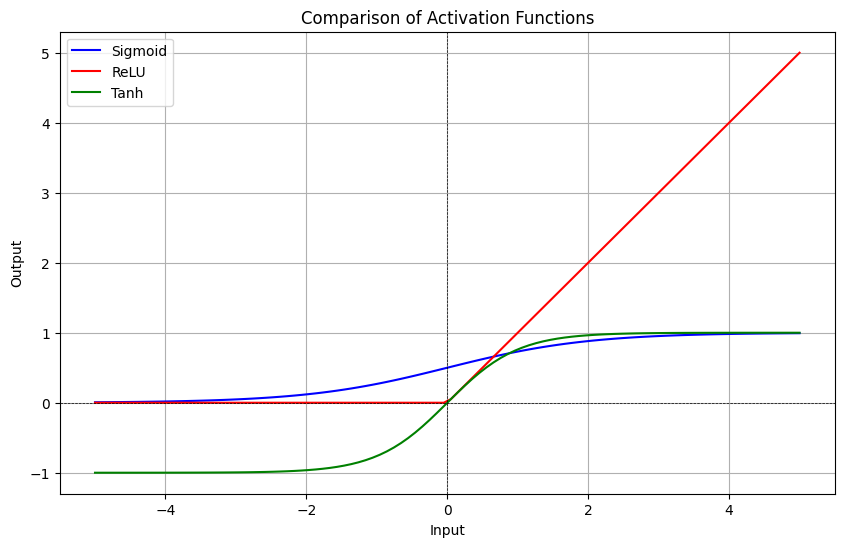

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def tanh(x):
    return np.tanh(x)

# Generate a dataset: a range of numbers from -5 to 5
x = np.linspace(-5, 5, 100)

# Compute outputs for each activation function
sigmoid_output = sigmoid(x)
relu_output = relu(x)
tanh_output = tanh(x)

# Plot the results for comparison
plt.figure(figsize=(10, 6))
plt.plot(x, sigmoid_output, label='Sigmoid', color='blue')
plt.plot(x, relu_output, label='ReLU', color='red')
plt.plot(x, tanh_output, label='Tanh', color='green')
plt.title('Comparison of Activation Functions')
plt.xlabel('Input')
plt.ylabel('Output')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend()
plt.grid()
plt.show()


1.E Forward and Backward propagation.

In [6]:
import numpy as np

# Forward propagation
def forward_propagation(X, weights, bias):
    return sigmoid(np.dot(X, weights) + bias)

# Backpropagation
def backward_propagation(X, y, weights, bias, learning_rate):
    output = forward_propagation(X, weights, bias)
    error = y - output
    d_weights = np.dot(X.T, error * sigmoid_derivative(output))
    d_bias = np.sum(error * sigmoid_derivative(output), axis=0)
    weights += learning_rate * d_weights
    bias += learning_rate * d_bias
    return weights, bias

# Example dataset
X = np.array([[0, 1], [1, 0], [1, 1], [0, 0]])
y = np.array([[1], [1], [0], [0]])
weights = np.random.uniform(size=(2, 1))
bias = np.random.uniform(size=(1,))
learning_rate = 0.1

for epoch in range(100):
    weights, bias = backward_propagation(X, y, weights, bias, learning_rate)

print(f"Trained weights: {weights}, bias: {bias}")


Trained weights: [[0.18699924]
 [0.32403605]], bias: [-0.23479315]
